<a href="https://colab.research.google.com/github/Lucasmsorretino/TrabArqDados/blob/mushroom-downloaded/trab2_mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 02 - melhorar o desempenho de RP em conjunto de dados existentes

### Alunos: Lucas de Castro Oliveira e Lucas Martins Sorrentino

A atividade 02 visa trabalhar com um conjunto de dados pré-construído, onde as opções que o desenvolvedor tem, são de aplicar as técnicas de pré-processamento abaixo relacionadas:


Base de dados escolhida: Secondary Mushroom
Link: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Sobre a base de dados:

Esta base de dados foi criada com a finalidade de simular e fornecer um conjunto de dados maior e mais variado de cogumelos hipotéticos para tarefas de aprendizado de máquina e análise de dados, inspirado no conjunto de dados de cogumelos original de J. Schlimmer.

url:https://archive.ics.uci.edu/ml/datasets/Mushroom.

Este conjunto de dados inclui 61.069 cogumelos hipotéticos com Píleo (chapéus do cogumelo) baseado em 173 espécies (353 cogumelos por espécie). Cada cogumelo é identificado como definitivamente comestível, definitivamente venenoso ou com classificação duvidosa e não recomendado para consumo (esta última classe combinada com a classe de cogumelos venenosos).

Descrição dos dados:

| Variável             | Papel     | Tipo       | Descrição                         | Unidade | Valores ausentes |
|----------------------|-----------|------------|-----------------------------------|---------|------------------|
| class                | Classe    | Categórico | Target (p venenoso, e comestível) | -       | não              |
| cap-diameter         | Atributo  | Contínuo   | diâmetro do píleo                 | cm      | não              |
| cap-shape            | Atributo  | Categórico | formato do píleo                  | -       | não              |
| cap-surface          | Atributo  | Categórico | superfície do píleo               | -       | sim              |
| cap-color            | Atributo  | Categórico | cor do píleo                      | -       | não              |
| does-bruise-or-bleed | Atributo  | Categórico | cogumelo machuca ou sangra        | -       | não              |
| gill-attachment      | Atributo  | Categórico | posição da lamela                 | -       | sim              |
| gill-spacing         | Atributo  | Categórico | espaçamento da lamela             | -       | sim              |
| gill-color           | Atributo  | Categórico | cor da lamela                     | -       | não              |
| stem-height          | Atributo | Contínuo   | altura da haste                   | cm      | não              |
| stem-width           | Atributo | Contínuo | largura da haste                  | mm      | não              |
| stem-root            | Atributo | Categórico | tipo de raíz                      | -       | sim              |
| stem-surface         | Atributo | Categórico | superfície da haste               | -       | sim              |
| stem-color           | Atributo | Categórico | cor da haste                      | -       | não              |
| veil-type            | Atributo | Categórico | tipo de véu                       | -       | sim              |
| veil-color           | Atributo | Categórico | cor do véu                        | -       | sim              |
| has-ring             | Atributo | Categórico | possuie anel                      | -       | não              |
| ring-type            | Atributo | Categórico | tipo de anel                      | -       | sim              |
| spore-print-color    | Atributo | Categórico | cor da marca de esporos           | -       | sim              |
| habitat              | Atributo | Categórico | habitat (onde cresce)             | -       | não              |
| season               | Atributo | Categórico | estação do ano                    | -       | não              |

In [66]:
# execute pip install ucimlrepo no terminal para instalar o pacote da uci e baixar os dados.
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# fetch dataset
# secondary_mushroom = fetch_ucirepo(id=848) # Original line commented out

# Load dataset from local CSV file
df = pd.read_csv('/content/secondary_data.csv', sep=';')

# data (as pandas dataframes)
X = df.drop(columns=["class"]) # Assuming 'class' is the target column
y = df['class'] # Assuming 'class' is the target column

print(df.head()) # Print the head of the loaded dataframe for verification

  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y   

## Distribuição de amostras para cada classe

In [68]:
y.value_counts()

,count
class,
p,33888
e,27181


## Considerações sobre a característica dos dados:

* A grande maioria dos atributos são do tipo nominal. Logo será necessário aplicar a técnica de codificação para usar em algorítmos de ML tais como o SVM.
* Alguns atributos possuem valores faltantes em uma proporção significativa. Nos casos em que a quantidade excede os 40%, adotaremos uma estratégia para eliminar a feature do modelo. Segue abaixo a taxa de proporção de dados faltantes para os atributos marcados como portadores de NaN.

In [69]:
total_samples = X.shape[0]
attributes_with_missing_values = ['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color']
for attribute in attributes_with_missing_values:
    print(f"Attribute: {attribute} has {(X[attribute].isna().sum() / total_samples)*100:.2f}% missing values")

Attribute: cap-surface has 23.12% missing values
Attribute: gill-attachment has 16.18% missing values
Attribute: gill-spacing has 41.04% missing values
Attribute: stem-root has 84.39% missing values
Attribute: stem-surface has 62.43% missing values
Attribute: veil-type has 94.80% missing values
Attribute: veil-color has 87.86% missing values
Attribute: ring-type has 4.05% missing values
Attribute: spore-print-color has 89.60% missing values


### Estratégia 1 - Eliminar atributos com taxa elevada de dados faltantes

Neste caso, optamos por eliminar os seguintes atributos do modelo por entender que estes agregam pouca informação:
1. veil-type
2. veil-color
3. spore-print-color
4. stem-root
5. stem-surface
6. gill-spacing

Como todos eles são nominais, fica um tanto complexo substituir por valores como média e mediana. Substituir estes pela moda ou valores aleatórios também não parece fazer sentido para estes atributos.

In [70]:
columns_to_drop = ['veil-type', 'veil-color', 'spore-print-color', 'stem-root', 'stem-surface', 'gill-spacing']
cleaned_df = X.drop(columns=columns_to_drop)

## Estratégia 2 - Eliminar linhas com atributos faltantes

Como o atributo ring-type possui dados faltantes em < 5% dos amostras, podemos eliminar as linhas que possuem esta coluna incompleta do modelo

In [71]:
lines_to_drop = cleaned_df[cleaned_df['ring-type'].isna()].index
cleaned_df = cleaned_df.drop(lines_to_drop, axis=0)

## Estratégia 3 - Fazer inputação em atributos entre 15% e 25% de informações faltantes

Agora que os atributos com excesso de dados faltantes foram eliminados e os registros com atributos ring-type faltantes foram eliminados, optamos por fazer a inputação de dados nos atributos cap-surface e gill-attachment, com 23% e 16% de valores ausentes respectivamente. Optamos por preencher os dados faltantes de cada atributo pela moda de cada um deles.

Como esta etapa vai modificar o conjunto de dados vamos ter que fazer o split agora para os dados de teste não entrarem nos cálculos da moda.

Como apagamos algumas linhas na seção Estratégia 2, precisamos criar uma versão da Series de target sem os valores da linhas apagadas também.

In [72]:
y_cleaned = y.drop(lines_to_drop, axis=0)

X_train, X_test, y_train, y_test = train_test_split(cleaned_df, y_cleaned, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (46878, 14)
Shape of X_test: (11720, 14)
Shape of y_train: (46878,)
Shape of y_test: (11720,)


In [73]:
# obtém as modas do conjunto de treinamento
mode_cap_surface = X_train['cap-surface'].mode()
mode_gill_attachment = X_train['gill-attachment'].mode()
print(f"mode_cap_surface is unique? {len(mode_cap_surface) == 1}. Values is(are): {mode_cap_surface}")
print(f"mode_gill_attachment is unique? {len(mode_gill_attachment) == 1}. Values is(are): {mode_gill_attachment}")

mode_cap_surface is unique? True. Values is(are): 0    t
Name: cap-surface, dtype: object
mode_gill_attachment is unique? True. Values is(are): 0    a
Name: gill-attachment, dtype: object


As modas em ambas as colunas são únicas. Então fica mais fácil substituir as ocorrências de NaN com os valores obtidos (substituição única).

In [74]:
# Preencher os dados faltantes de treinamento com a moda
X_train['cap-surface'] = X_train['cap-surface'].fillna('t')
X_train['gill-attachment'] = X_train['gill-attachment'].fillna('a')

# Preencher os dados faltantes de teste com a moda obtida no treinamento
X_test['cap-surface'] = X_test['cap-surface'].fillna('t')
X_test['gill-attachment'] = X_test['gill-attachment'].fillna('a')

## Estratégia 4 - Codificação dos atributos nominais

Agora que fizemos a limpeza dos dados, partimos para codificação dos atributos nominais. Usamos a codificação one-hot encoding pois os atributos não possuem uma ordenação, sendo cada valor uma classificação.

In [75]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
display("Categorical columns to encode:", categorical_cols)

encoded_x_train = pd.get_dummies(X_train, columns=categorical_cols, dummy_na=False)
encoded_x_test = pd.get_dummies(X_test, columns=categorical_cols, dummy_na=False)

display(encoded_x_train.head())
display(encoded_x_test.head())

'Categorical columns to encode:'

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
35860,4.04,4.54,6.22,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
19733,2.42,2.70,5.08,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
25147,19.67,9.40,25.80,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
55066,3.57,6.44,7.23,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
19948,4.82,6.19,5.81,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
40585,8.65,5.98,8.75,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
29955,3.76,4.81,5.98,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
29015,6.74,6.12,5.10,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
55052,3.39,6.47,7.70,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
54668,5.48,3.60,10.61,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Treinar modelo com o SVM

Agora que preparamos os dados, podemos treinar um modelo com o SVM para detectarmos quando um cogumelo é venenoso ou não baseado nos atributos.

Já fizemos o split de dados na seção anterior em 80/20 treinamento e teste respectivamente.

Iremos treinar o modelo e tirar a matriz do confusão em cima dos dados de treinamento.

In [76]:
alg = svm.SVC()
model = alg.fit(encoded_x_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = model.predict(encoded_x_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

Matriz de confusão - com os dados usados no TREINAMENTO
[[18345  2321]
 [ 2182 24030]]
              precision    recall  f1-score   support

           e       0.89      0.89      0.89     20666
           p       0.91      0.92      0.91     26212

    accuracy                           0.90     46878
   macro avg       0.90      0.90      0.90     46878
weighted avg       0.90      0.90      0.90     46878



Informação importante para uso posterior: do jeito que está demorou +/- uns 5-6 minutos no google colab para treinar o modelo. Agora vamos validá-lo com os dados de teste.

In [77]:
# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados usados para TESTES')
y2_pred = model.predict(encoded_x_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred))

Matriz de confusão - com os dados usados para TESTES
[[4467  636]
 [ 557 6060]]
              precision    recall  f1-score   support

           e       0.89      0.88      0.88      5103
           p       0.91      0.92      0.91      6617

    accuracy                           0.90     11720
   macro avg       0.90      0.90      0.90     11720
weighted avg       0.90      0.90      0.90     11720



Para os dados de teste os resultados foram 89% de precisão para a detecção de cogumelos comestíveis e 91% para a detecção de cogumelos venenosos. A sensibilidade (recall) para estas classes também foram de 88% e 91% respectivamente, o que justifica os F1-scores elevados.

No entanto, ainda cabe mais algumas otimizações no modelo que podem ser feitas afim de deixar os dados mais adequados para o treinamento no SVM.

## Otimização 1 - Adequação da escala dos atributos contínuos

Os atributos contínuos cap-diameter (diâmetro do píleo) e stem-height (altura da haste) estão em centímetros, enquanto que o atributo stem-width (largua da haste) estão em milímetros. Para otimizar a performance do algorítmo seria interessante padronizar a dimensão de comprimento deste conjunto de dados para trabalhar tudo com milímetros (mm), ou centímetros (cm). Optamos por alterar os atributos cap-diameter e stem-height para milímetros.

In [78]:
# Converter para mm no conjunto de treinamento
encoded_x_train['cap-diameter'] = encoded_x_train['cap-diameter'] * 10.0
encoded_x_train['stem-height'] = encoded_x_train['stem-height'] * 10.0

# Converter para mm no conjunto de teste
encoded_x_test['cap-diameter'] = encoded_x_test['cap-diameter'] * 10.0
encoded_x_test['stem-height'] = encoded_x_test['stem-height'] * 10.0

print('Sample for x_train')
print(encoded_x_train['cap-diameter'].sample(n=3))
print()
print(encoded_x_train['stem-height'].sample(n=3))
print()

print('Sample for x_test')
print(encoded_x_test['cap-diameter'].sample(n=3))
print()
print(encoded_x_test['stem-height'].sample(n=3))


Sample for x_train
49236    68.5
14644    43.6
38344    88.2
Name: cap-diameter, dtype: float64

43085    79.5
60305    39.1
36547    69.1
Name: stem-height, dtype: float64

Sample for x_test
20668     26.1
41464    110.5
19230     42.1
Name: cap-diameter, dtype: float64

29003    73.9
9971     38.2
12507    60.9
Name: stem-height, dtype: float64


## Otimização 2 - Normalização dos atributos contínuos

Os atributos cap-diamater (diâmetro do píleo), stem-height (altura da haste) e stem-width (largura da haste) são dados contínuos que podem ser normalizados ou padronizados para otimizar a execução do SVM. Para decidirmos entre a normalizão ou padronização, vamos tentar validar **no conjunto de treinamento** se os atributos contínuos possuem uma distribuição normal.

### Atributo - cap-diameter:

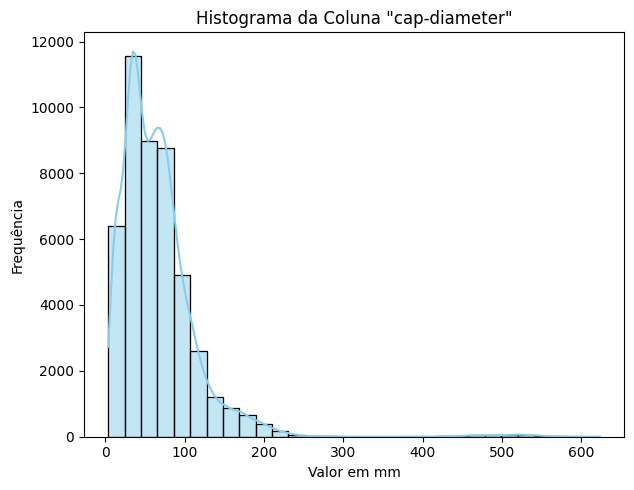

In [79]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(encoded_x_train['cap-diameter'], kde=True, bins=30, color='skyblue')
plt.title('Histograma da Coluna "cap-diameter"')
plt.xlabel('Valor em mm')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

### Atributo stem-height

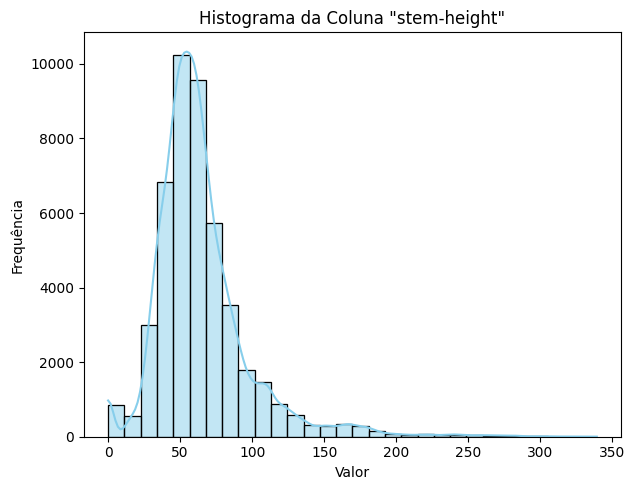

In [80]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(encoded_x_train['stem-height'], kde=True, bins=30, color='skyblue')
plt.title('Histograma da Coluna "stem-height"')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

### Atributo stem-width

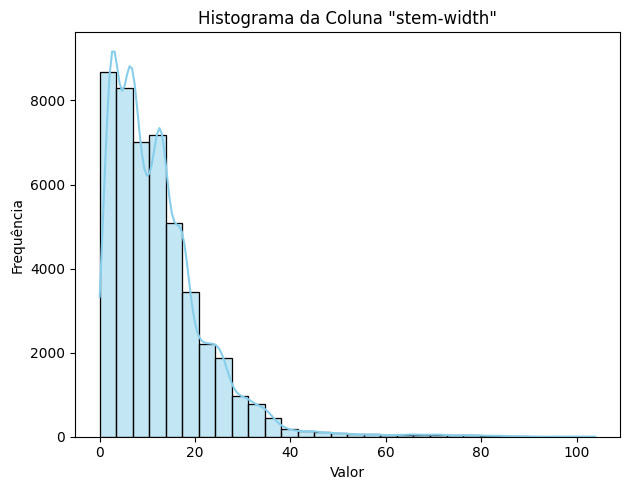

In [81]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(encoded_x_train['stem-width'], kde=True, bins=30, color='skyblue')
plt.title('Histograma da Coluna "stem-width"')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

Em uma análise visual é possível concluir que os atributos cap-diameter e stem-height seguem uma curva que se assemelha a normal (com a presença de poucos outliers). No entanto, o atributo stem-width não possui uma distribuição normal. Então vamos fazer as seguintes transformações nestes dados:

* para os atributos cap-diameter e stem-height vamos aplicar o transformador do tipo StandardScaler() para padronizar os dados.
* para o atributo stem-width vamos aplicar o transformador MinMaxScaler() para normalizar os dados.

**Importante:** Vamos aplicar o transformador no conjunto de treinamento e DEPOIS usar a média e desvio padrão obtidos para transformar o conjunto de teste, desta forma a gente evita um detaleak indireto o que poderia inflar de forma artificial a performance do modelo.

In [82]:
scaler_standard = StandardScaler()
scaler_standard.fit(encoded_x_train[['cap-diameter', 'stem-height']])
encoded_x_train[['cap-diameter', 'stem-height']] = scaler_standard.transform(encoded_x_train[['cap-diameter', 'stem-height']])
encoded_x_test[['cap-diameter', 'stem-height']] = scaler_standard.transform(encoded_x_test[['cap-diameter', 'stem-height']])


scaler_minmax = MinMaxScaler()
scaler_minmax.fit(encoded_x_train[['stem-width']])
encoded_x_train['stem-width'] = scaler_minmax.transform(encoded_x_train[['stem-width']])
encoded_x_test['stem-width'] = scaler_minmax.transform(encoded_x_test[['stem-width']])

# Treinar modelo com o SVM depois das otimizações

Depois de feitas estas otimizações, vamos treinar novamente o nosso modelo para detectar se houve melhora no desempenho em comparação ao modelo treinado com os dados fora de escala e desnormalizados.

In [83]:
alg = svm.SVC()
model = alg.fit(encoded_x_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = model.predict(encoded_x_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados OTIMIZADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

Matriz de confusão - com os dados OTIMIZADOS usados no TREINAMENTO
[[20505   161]
 [   60 26152]]
              precision    recall  f1-score   support

           e       1.00      0.99      0.99     20666
           p       0.99      1.00      1.00     26212

    accuracy                           1.00     46878
   macro avg       1.00      0.99      1.00     46878
weighted avg       1.00      1.00      1.00     46878



Curiosidade: O modelo treinou entre 1 e 2 minutos, sinal que o SVM convergiu mais rápido desta vez graças a normalização dos dados.

In [84]:
# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados OTIMIZADOS usados para TESTES')
y2_pred = model.predict(encoded_x_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred))

Matriz de confusão - com os dados OTIMIZADOS usados para TESTES
[[5074   29]
 [  19 6598]]
              precision    recall  f1-score   support

           e       1.00      0.99      1.00      5103
           p       1.00      1.00      1.00      6617

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



# Conclusão

Deu para perceber que as otimizações contribuiram bastante para a performance do modelo.

Das 5.103 amostras de cogumelos comestíveis, o modelo previu corretamente 5.074 amostras e julgou 29 cogumelos seguros como venenosos, com uma acurácia de 99,43% de acerto.

Das 6.617 amostras de cogumelos venenosos, o modelo previu corretamente 6.598 amostras corretamente e julgou 19 cogumelos venenosos como seguros, com uma acurácia de 99,71% de acerto.

Notamos que esta acurácia está muito alta, o que não descarta a possibilidade de overfitting do modelo, no entanto tomamos alguns cuidados para evitar isso como:

1. Imputar a moda do conjunto de treinamento no de teste, não usando o conjunto de teste para o cálculo da moda
2. Usar o desvio padrão e média do conjunto de treinamento para normalizar e padronizar o conjunto de teste, evitando vazamento de dados indiretos.

Comparado com o modelo anterior, houve um aumento de 10 pontos percentuais de acurácia para detecção de cogumelos seguros para comer e de 8 pontos percentuais para detecção de cogumelos venenosos.